##### Experiment with hidden layers and hidden units

The most commonly used layers in general neural networks are fullyconnected layers.

In fully-connected layers, the units in two successive layers are all pairwise connected. 

However, the units within a layer don't share any connections. 

As stated before, the connections between the layers are also called trainable parameters.

The weights of these connections are trained by the network. 

The more connections, the more parameters and the more complex patterns can be modeled. 

Most state-of-the-art models have 100+ million parameters. 

However, a deep neural network with many layers and units takes more time to train. 

Also, with extremely deep models the time to infer predictions takes significantly longer (which can be problematic in a real-time environment). 

We will see other popular layer types that are specific to their network types.

Picking the correct number of hidden layers and hidden units can be important. 

When using too few nodes, the model won't be able to pick up all the signals, resulting in a low accuracy and poor predictive performance (underfitting). 

Using too many nodes, the model will tend to overfit on the training data, regularization techniques can be used to prevent overfitting and won't be able to generalize well. 

Therefore, we always have to look at the performance on the validation data to find the right balance. 


In [43]:
# Import libraries as follows

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

SEED = 2017

In [2]:
# Data can be downloaded at https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [44]:
# Load the dataset

data = pd.read_csv('C:\\Users\\ifsrk\\Documents\\01 Deep Learning\\winequality-red.csv', sep=';')
y = data['quality']
X = data.drop(['quality'], axis=1)

In [45]:
# Split the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [46]:
# Normalize the input data

scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [47]:
print("Input Layers :", X_train.shape[1])

Input Layers : 11


In [48]:
# Define the model and optimizer and compile

model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(1024, activation='relu')) 
model.add(Dense(1024, activation='relu')) 
model.add(Dense(1024, activation='relu')) 
# Output layer
model.add(Dense(1, activation='linear'))
# Set optimizer
opt = SGD(learning_rate=0.01)
# Compile model
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

In [17]:
! pip install pydot

In [19]:
! pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=5e5f1da491225e240e5b5725c5ec3a49a151f647dbeaff58076316ccb75dd82e
  Stored in directory: c:\users\ifsrk\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [24]:
! pip install graphviz

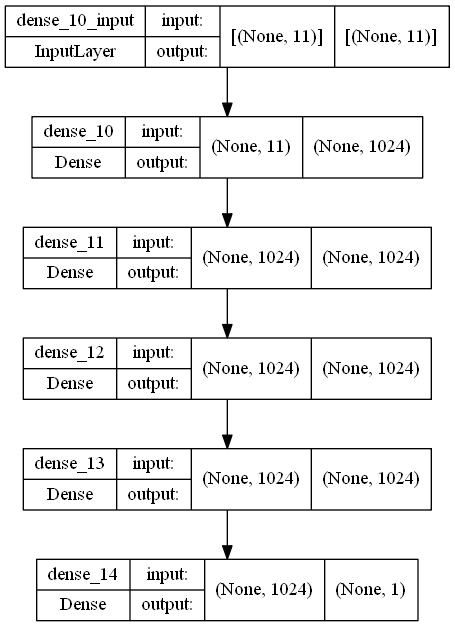

In [52]:
# Visualize network architecture

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

# Save the visualization as a file
plot_model(model, show_shapes=True, to_file="network_model.png")

In [53]:
# Set the hyperparameters and train the model

n_epochs = 500
batch_size = 256

history = model.fit(X_train.values, y_train, batch_size=batch_size, epochs=n_epochs, validation_split=0.2, verbose=1)

Epoch 1/500
4/4 [==============================] - 1s 72ms/step - loss: 22.7064 - accuracy: 0.0000e+00 - val_loss: 5.2726 - val_accuracy: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 0s 49ms/step - loss: 3.1667 - accuracy: 0.0000e+00 - val_loss: 1.5412 - val_accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 51ms/step - loss: 1.8347 - accuracy: 0.0000e+00 - val_loss: 1.2469 - val_accuracy: 0.0000e+00
Epoch 4/500
4/4 [==============================] - 0s 52ms/step - loss: 1.4770 - accuracy: 0.0000e+00 - val_loss: 1.0793 - val_accuracy: 0.0000e+00
Epoch 5/500
4/4 [==============================] - 0s 48ms/step - loss: 1.2447 - accuracy: 0.0000e+00 - val_loss: 1.0129 - val_accuracy: 0.0000e+00
Epoch 6/500
4/4 [==============================] - 0s 45ms/step - loss: 1.1265 - accuracy: 0.0000e+00 - val_loss: 0.9092 - val_accuracy: 0.0000e+00
Epoch 7/500
4/4 [==============================] - 0s 51ms/step - loss: 1.0264 - accuracy: 0.0000e+00 - val_los

4/4 [==============================] - 0s 48ms/step - loss: 0.3548 - accuracy: 0.0000e+00 - val_loss: 0.4074 - val_accuracy: 0.0000e+00
Epoch 57/500
4/4 [==============================] - 0s 53ms/step - loss: 0.3521 - accuracy: 0.0000e+00 - val_loss: 0.4014 - val_accuracy: 0.0000e+00
Epoch 58/500
4/4 [==============================] - 0s 56ms/step - loss: 0.3536 - accuracy: 0.0000e+00 - val_loss: 0.4034 - val_accuracy: 0.0000e+00
Epoch 59/500
4/4 [==============================] - 0s 47ms/step - loss: 0.3474 - accuracy: 0.0000e+00 - val_loss: 0.3977 - val_accuracy: 0.0000e+00
Epoch 60/500
4/4 [==============================] - 0s 46ms/step - loss: 0.3479 - accuracy: 0.0000e+00 - val_loss: 0.4225 - val_accuracy: 0.0000e+00
Epoch 61/500
4/4 [==============================] - 0s 48ms/step - loss: 0.3507 - accuracy: 0.0000e+00 - val_loss: 0.4151 - val_accuracy: 0.0000e+00
Epoch 62/500
4/4 [==============================] - 0s 50ms/step - loss: 0.3462 - accuracy: 0.0000e+00 - val_loss: 0.40

Epoch 111/500
4/4 [==============================] - 0s 43ms/step - loss: 0.3115 - accuracy: 0.0000e+00 - val_loss: 0.3944 - val_accuracy: 0.0000e+00
Epoch 112/500
4/4 [==============================] - 0s 45ms/step - loss: 0.2889 - accuracy: 0.0000e+00 - val_loss: 0.3972 - val_accuracy: 0.0000e+00
Epoch 113/500
4/4 [==============================] - 0s 41ms/step - loss: 0.2903 - accuracy: 0.0000e+00 - val_loss: 0.3808 - val_accuracy: 0.0000e+00
Epoch 114/500
4/4 [==============================] - 0s 43ms/step - loss: 0.2891 - accuracy: 0.0000e+00 - val_loss: 0.4038 - val_accuracy: 0.0000e+00
Epoch 115/500
4/4 [==============================] - 0s 45ms/step - loss: 0.2875 - accuracy: 0.0000e+00 - val_loss: 0.3851 - val_accuracy: 0.0000e+00
Epoch 116/500
4/4 [==============================] - 0s 47ms/step - loss: 0.2851 - accuracy: 0.0000e+00 - val_loss: 0.3792 - val_accuracy: 0.0000e+00
Epoch 117/500
4/4 [==============================] - 0s 46ms/step - loss: 0.2857 - accuracy: 0.0000e

4/4 [==============================] - 0s 45ms/step - loss: 0.2844 - accuracy: 0.0000e+00 - val_loss: 0.3647 - val_accuracy: 0.0000e+00
Epoch 166/500
4/4 [==============================] - 0s 50ms/step - loss: 0.2608 - accuracy: 0.0000e+00 - val_loss: 0.3694 - val_accuracy: 0.0000e+00
Epoch 167/500
4/4 [==============================] - 0s 52ms/step - loss: 0.2794 - accuracy: 0.0000e+00 - val_loss: 0.3656 - val_accuracy: 0.0000e+00
Epoch 168/500
4/4 [==============================] - 0s 48ms/step - loss: 0.2572 - accuracy: 0.0000e+00 - val_loss: 0.3918 - val_accuracy: 0.0000e+00
Epoch 169/500
4/4 [==============================] - 0s 51ms/step - loss: 0.2487 - accuracy: 0.0000e+00 - val_loss: 0.3689 - val_accuracy: 0.0000e+00
Epoch 170/500
4/4 [==============================] - 0s 45ms/step - loss: 0.2655 - accuracy: 0.0000e+00 - val_loss: 0.3669 - val_accuracy: 0.0000e+00
Epoch 171/500
4/4 [==============================] - 0s 48ms/step - loss: 0.2653 - accuracy: 0.0000e+00 - val_loss

Epoch 220/500
4/4 [==============================] - 0s 49ms/step - loss: 0.2492 - accuracy: 0.0000e+00 - val_loss: 0.4348 - val_accuracy: 0.0000e+00
Epoch 221/500
4/4 [==============================] - 0s 50ms/step - loss: 0.2491 - accuracy: 0.0000e+00 - val_loss: 0.3847 - val_accuracy: 0.0000e+00
Epoch 222/500
4/4 [==============================] - 0s 55ms/step - loss: 0.2258 - accuracy: 0.0000e+00 - val_loss: 0.4041 - val_accuracy: 0.0000e+00
Epoch 223/500
4/4 [==============================] - 0s 51ms/step - loss: 0.2470 - accuracy: 0.0000e+00 - val_loss: 0.4683 - val_accuracy: 0.0000e+00
Epoch 224/500
4/4 [==============================] - 0s 48ms/step - loss: 0.2814 - accuracy: 0.0000e+00 - val_loss: 0.4773 - val_accuracy: 0.0000e+00
Epoch 225/500
4/4 [==============================] - 0s 50ms/step - loss: 0.3032 - accuracy: 0.0000e+00 - val_loss: 0.4669 - val_accuracy: 0.0000e+00
Epoch 226/500
4/4 [==============================] - 0s 53ms/step - loss: 0.2403 - accuracy: 0.0000e

4/4 [==============================] - 0s 48ms/step - loss: 0.2676 - accuracy: 0.0000e+00 - val_loss: 0.4015 - val_accuracy: 0.0000e+00
Epoch 275/500
4/4 [==============================] - 0s 48ms/step - loss: 0.2364 - accuracy: 0.0000e+00 - val_loss: 0.3864 - val_accuracy: 0.0000e+00
Epoch 276/500
4/4 [==============================] - 0s 49ms/step - loss: 0.2293 - accuracy: 0.0000e+00 - val_loss: 0.3684 - val_accuracy: 0.0000e+00
Epoch 277/500
4/4 [==============================] - 0s 45ms/step - loss: 0.2177 - accuracy: 0.0000e+00 - val_loss: 0.3659 - val_accuracy: 0.0000e+00
Epoch 278/500
4/4 [==============================] - 0s 47ms/step - loss: 0.2127 - accuracy: 0.0000e+00 - val_loss: 0.3635 - val_accuracy: 0.0000e+00
Epoch 279/500
4/4 [==============================] - 0s 45ms/step - loss: 0.2040 - accuracy: 0.0000e+00 - val_loss: 0.3614 - val_accuracy: 0.0000e+00
Epoch 280/500
4/4 [==============================] - 0s 47ms/step - loss: 0.2193 - accuracy: 0.0000e+00 - val_loss

Epoch 329/500
4/4 [==============================] - 0s 53ms/step - loss: 0.1957 - accuracy: 0.0000e+00 - val_loss: 0.3683 - val_accuracy: 0.0000e+00
Epoch 330/500
4/4 [==============================] - 0s 47ms/step - loss: 0.1818 - accuracy: 0.0000e+00 - val_loss: 0.3619 - val_accuracy: 0.0000e+00
Epoch 331/500
4/4 [==============================] - 0s 47ms/step - loss: 0.1800 - accuracy: 0.0000e+00 - val_loss: 0.3618 - val_accuracy: 0.0000e+00
Epoch 332/500
4/4 [==============================] - 0s 47ms/step - loss: 0.1822 - accuracy: 0.0000e+00 - val_loss: 0.3672 - val_accuracy: 0.0000e+00
Epoch 333/500
4/4 [==============================] - 0s 45ms/step - loss: 0.1785 - accuracy: 0.0000e+00 - val_loss: 0.3888 - val_accuracy: 0.0000e+00
Epoch 334/500
4/4 [==============================] - 0s 51ms/step - loss: 0.1782 - accuracy: 0.0000e+00 - val_loss: 0.3661 - val_accuracy: 0.0000e+00
Epoch 335/500
4/4 [==============================] - 0s 51ms/step - loss: 0.1859 - accuracy: 0.0000e

4/4 [==============================] - 0s 50ms/step - loss: 0.3163 - accuracy: 0.0000e+00 - val_loss: 0.5446 - val_accuracy: 0.0000e+00
Epoch 384/500
4/4 [==============================] - 0s 62ms/step - loss: 0.2839 - accuracy: 0.0000e+00 - val_loss: 0.5774 - val_accuracy: 0.0000e+00
Epoch 385/500
4/4 [==============================] - 0s 56ms/step - loss: 0.4766 - accuracy: 0.0000e+00 - val_loss: 0.7694 - val_accuracy: 0.0000e+00
Epoch 386/500
4/4 [==============================] - 0s 54ms/step - loss: 0.4376 - accuracy: 0.0000e+00 - val_loss: 0.5246 - val_accuracy: 0.0000e+00
Epoch 387/500
4/4 [==============================] - 0s 54ms/step - loss: 0.2698 - accuracy: 0.0000e+00 - val_loss: 0.4453 - val_accuracy: 0.0000e+00
Epoch 388/500
4/4 [==============================] - 0s 57ms/step - loss: 0.2076 - accuracy: 0.0000e+00 - val_loss: 0.4647 - val_accuracy: 0.0000e+00
Epoch 389/500
4/4 [==============================] - 0s 54ms/step - loss: 0.1917 - accuracy: 0.0000e+00 - val_loss

Epoch 438/500
4/4 [==============================] - 0s 54ms/step - loss: 0.1650 - accuracy: 0.0000e+00 - val_loss: 0.4270 - val_accuracy: 0.0000e+00
Epoch 439/500
4/4 [==============================] - 0s 53ms/step - loss: 0.1525 - accuracy: 0.0000e+00 - val_loss: 0.3813 - val_accuracy: 0.0000e+00
Epoch 440/500
4/4 [==============================] - 0s 45ms/step - loss: 0.1605 - accuracy: 0.0000e+00 - val_loss: 0.4375 - val_accuracy: 0.0000e+00
Epoch 441/500
4/4 [==============================] - 0s 46ms/step - loss: 0.1820 - accuracy: 0.0000e+00 - val_loss: 0.4467 - val_accuracy: 0.0000e+00
Epoch 442/500
4/4 [==============================] - 0s 49ms/step - loss: 0.2189 - accuracy: 0.0000e+00 - val_loss: 0.5223 - val_accuracy: 0.0000e+00
Epoch 443/500
4/4 [==============================] - 0s 50ms/step - loss: 0.2780 - accuracy: 0.0000e+00 - val_loss: 0.5546 - val_accuracy: 0.0000e+00
Epoch 444/500
4/4 [==============================] - 0s 45ms/step - loss: 0.3121 - accuracy: 0.0000e

4/4 [==============================] - 0s 53ms/step - loss: 0.1391 - accuracy: 0.0000e+00 - val_loss: 0.3794 - val_accuracy: 0.0000e+00
Epoch 493/500
4/4 [==============================] - 0s 53ms/step - loss: 0.1410 - accuracy: 0.0000e+00 - val_loss: 0.4076 - val_accuracy: 0.0000e+00
Epoch 494/500
4/4 [==============================] - 0s 48ms/step - loss: 0.1458 - accuracy: 0.0000e+00 - val_loss: 0.3866 - val_accuracy: 0.0000e+00
Epoch 495/500
4/4 [==============================] - 0s 50ms/step - loss: 0.1420 - accuracy: 0.0000e+00 - val_loss: 0.3699 - val_accuracy: 0.0000e+00
Epoch 496/500
4/4 [==============================] - 0s 47ms/step - loss: 0.1351 - accuracy: 0.0000e+00 - val_loss: 0.4006 - val_accuracy: 0.0000e+00
Epoch 497/500
4/4 [==============================] - 0s 51ms/step - loss: 0.1444 - accuracy: 0.0000e+00 - val_loss: 0.4033 - val_accuracy: 0.0000e+00
Epoch 498/500
4/4 [==============================] - 0s 51ms/step - loss: 0.1567 - accuracy: 0.0000e+00 - val_loss

In [54]:
# Predict on the test set

predictions = model.predict(X_test.values)
print('Test accuracy: {:f>2}%'.format(np.round(np.sum([y_test==predictions.flatten().round()])/y_test.shape[0]*100, 2)))

Test accuracy: 54.37%


In [55]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [56]:
np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy']

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

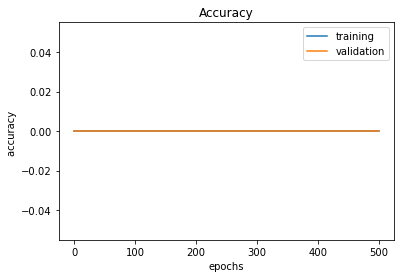

In [58]:
# Plot the training and validation accuracy

plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'], label='training')
plt.plot(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy ')
plt.legend(loc=0)
plt.show()

Training and validation accuracy We should focus on the validation accuracy and use early stopping to stop the training after around 450 epochs. 

This results in the highest validation accuracy. 


we can Improve generalization with regularization and Adding dropout to prevent overfitting, we will introduce techniques to prevent overfitting. 

By using these techniques, we can create deeper models without overfitting on the training data.
